In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('data_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19652 entries, 0 to 19651
Columns: 179 entries, smiles to Radius
dtypes: float64(178), object(1)
memory usage: 26.8+ MB


In [4]:
df

,smiles,gap,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinEStateIndex,...,n5Ring,n6Ring,n3HRing,n4HRing,n5HRing,n5AHRing,nFRing,GGI2,GGI3,Radius
0,O=C1OC=NCC11CN1,0.2331,2.65458,1.85295,1.4059,66.11,-453.960419,27.142,10.802361,-0.421875,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.444444,0.729167,3.0
1,C1C(CN1C=O)C=O,0.2082,4.94875,1.15582,3.8620,64.32,-399.811727,26.627,9.906019,0.111296,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.444444,0.750000,3.0
2,C1CC1N2CCOC2=O,0.2972,3.08235,1.38222,4.6197,72.18,-439.118302,29.710,10.759444,-0.113426,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.944444,0.500000,2.0
3,OC1CC1NC(=N)C=O,0.1597,3.95367,0.82949,4.6363,74.62,-455.127740,33.649,9.806103,-0.356204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.444444,0.375000,3.0
4,C1NC1C1CCOC=N1,0.2662,4.14610,1.04198,2.6945,76.88,-419.189278,30.168,4.958194,0.498843,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.381944,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,CCOc1cnno1,0.2199,7.81782,1.16858,4.2179,61.95,-415.833772,26.660,4.854167,0.368056,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.444444,0.222222,3.0
19648,CC1OC(C=C1)C#C,0.2532,5.06532,1.39767,1.6287,72.66,-346.571037,29.171,5.163194,-0.078704,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.569444,3.0
19649,N#CC12COC1CCC2,0.2876,2.32431,1.67523,3.1914,75.22,-401.959779,29.412,8.716944,-0.041667,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.444444,0.812500,2.0
19650,O=C1CCC(CO1)C#C,0.2704,4.58871,0.99416,3.9391,74.90,-421.836918,31.180,10.433724,-0.123611,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.888889,0.250000,3.0


# Dealing with duplicates

In [5]:
df_drop = df.drop_duplicates(subset=['smiles', 'gap'], keep='first')

In [6]:
len(df_drop)

19650

In [7]:
df_drop.duplicated(subset=['smiles']).sum()

0

# Outlier detection

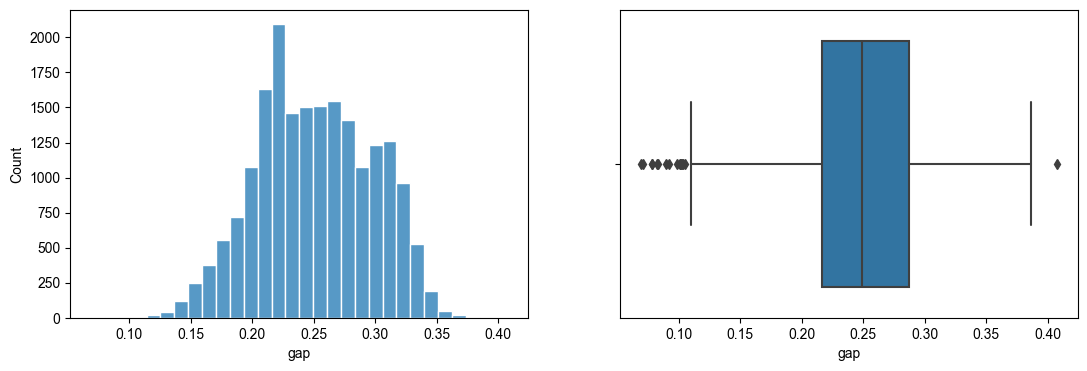

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(df_drop['gap'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=df_drop['gap'], ax=axs[1])
plt.show()

In [9]:
Q1 = df_drop['gap'].quantile(0.25)
Q3 = df_drop['gap'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_drop['gap'] >= Q1 - 1.5 * IQR) & (df_drop['gap'] <= Q3 + 1.5 *IQR)
final_dataset= df_drop.loc[filter]

In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19634 entries, 0 to 19651
Columns: 179 entries, smiles to Radius
dtypes: float64(178), object(1)
memory usage: 27.0+ MB


In [11]:
final_dataset.to_csv('data_final.csv', index=False)

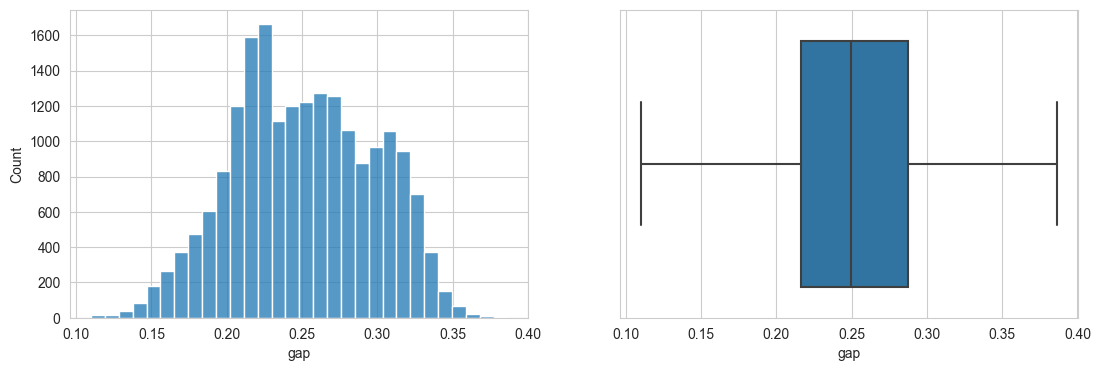

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(final_dataset['gap'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=final_dataset['gap'], ax=axs[1])
plt.show()

# Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
final_dataset.describe()

,gap,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinEStateIndex,SPS,...,n5Ring,n6Ring,n3HRing,n4HRing,n5HRing,n5AHRing,nFRing,GGI2,GGI3,Radius
count,19634.000000,19634.000000,19634.000000,19634.000000,19634.000000,19634.000000,19634.000000,19634.000000,1.963400e+04,19634.000000,...,19634.000000,19634.000000,19634.000000,19634.00000,19634.000000,19634.000000,19634.000000,19634.000000,19634.000000,19634.000000
mean,0.250989,15.260916,1.381164,2.690360,75.357028,-412.366346,31.624067,8.250735,-2.367763e-02,37.473015,...,0.495111,0.160538,0.232505,0.29836,0.340837,0.209840,0.431649,1.401780,0.781196,2.750993
std,0.046885,1660.420889,0.432206,1.473364,7.810003,38.513150,3.964734,2.448100,5.660622e-01,21.866454,...,0.701013,0.425705,0.464149,0.63048,0.572868,0.489146,0.496038,0.682049,0.397869,0.508152
min,0.109900,0.000000,0.355570,0.000000,40.770000,-621.434020,15.146000,1.560185,-4.629931e+00,3.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.216425,2.562043,1.085002,1.583575,70.550000,-437.929109,28.931000,5.543981,-3.657407e-01,16.222222,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.888889,0.500000,2.000000
50%,0.249500,3.099220,1.357250,2.485950,75.555000,-417.964802,31.584000,9.003981,-1.110223e-16,37.111111,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.277778,0.687500,3.000000
75%,0.287700,3.842157,1.639040,3.624600,80.510000,-387.073289,34.282000,10.272244,3.697917e-01,54.222222,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.777778,1.041667,3.000000
max,0.386400,232663.788800,5.949580,16.797100,119.600000,-232.036378,45.125000,12.605741,2.094388e+00,108.000000,...,5.000000,4.000000,3.000000,6.00000,4.000000,4.000000,2.000000,5.166667,2.625000,4.000000


In [15]:
final_dataset.columns

Index(['smiles', 'gap', 'A', 'B', 'mu', 'alpha', 'u0', 'cv',
       'MaxAbsEStateIndex', 'MinEStateIndex',
       ...
       'n5Ring', 'n6Ring', 'n3HRing', 'n4HRing', 'n5HRing', 'n5AHRing',
       'nFRing', 'GGI2', 'GGI3', 'Radius'],
      dtype='object', length=179)

In [16]:
df_normalized = df.copy()

scaler = MinMaxScaler()

columns_to_normalize = df_normalized.columns.difference(['gap', 'smiles'])

df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [17]:
df_normalized.to_csv('data_final.csv', index=False)

In [18]:
df_normalized.describe()

,gap,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinEStateIndex,SPS,...,n5Ring,n6Ring,n3HRing,n4HRing,n5HRing,n5AHRing,nFRing,GGI2,GGI3,Radius
count,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,...,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000
mean,0.250869,0.000066,0.183288,0.117510,0.438841,0.536812,0.549620,0.605776,0.684926,0.328159,...,0.099074,0.040136,0.077482,0.049681,0.085258,0.052450,0.215729,0.271258,0.297506,0.375585
std,0.047090,0.007133,0.077296,0.065800,0.099182,0.098951,0.132258,0.221636,0.084324,0.208291,...,0.140258,0.106415,0.154692,0.105043,0.143232,0.122289,0.248005,0.132006,0.151563,0.254050
min,0.069200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.216400,0.000011,0.130315,0.068987,0.377775,0.471247,0.459814,0.360670,0.634058,0.125926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172043,0.190476,0.000000
50%,0.249400,0.000013,0.179026,0.108308,0.441329,0.522521,0.548267,0.674060,0.688535,0.324868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.247312,0.261905,0.500000
75%,0.287600,0.000017,0.229435,0.157942,0.504250,0.601854,0.638313,0.788738,0.743528,0.487831,...,0.200000,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.344086,0.396825,0.500000
max,0.407400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
